In [1]:
import os
import sys

project_dir = os.path.realpath(os.path.join(os.getcwd(), '..','..','..','..'))
tool_dir = os.path.join(project_dir, 'Utils')
sys.path.append(tool_dir)

In [2]:
import pandas as pd
from workers import *
from MRS import regimeSwitch, mrsPreprocess, get_MRS_stats
import warnings
import numpy as np

plt.style.use('seaborn-whitegrid')
warnings.filterwarnings("ignore")

In [3]:
start = '2019-01-01'
end = '2021-05-14'
ticker = ['QQQ']
df = get_all_price(ticker, start, end)
df.head()

[*********************100%***********************]  1 of 1 completed


,open,high,low,close,adj close,volume
Date,,,,,,
2019-01-02,150.990005,155.750000,150.880005,154.880005,152.375031,58576700
2019-01-03,152.600006,153.259995,149.490005,149.820007,147.396896,74820200
2019-01-04,152.339996,157.000000,151.740005,156.229996,153.703201,74709300
2019-01-07,156.619995,158.860001,156.110001,158.089996,155.533112,52059300
2019-01-08,159.539993,160.110001,157.199997,159.520004,156.939987,49388700


In [4]:
processed_data = mrsPreprocess(df)
train, test = processed_data.split_train_test(testNum=80)

train_endog, train_exog = train['ret'], train[['lag1_ret','lag2_ret']]
test_endog, test_exog = test['ret'], test[['lag1_ret','lag2_ret']]

In [10]:
predictV, predictP, rmse, actual, model = get_MRS_stats(train_endog, train_exog, test_endog, test_exog)
rmsedf = pd.DataFrame(rmse)
rmsedf

<AxesSubplot:title={'center':'RMSE for 2 models'}>

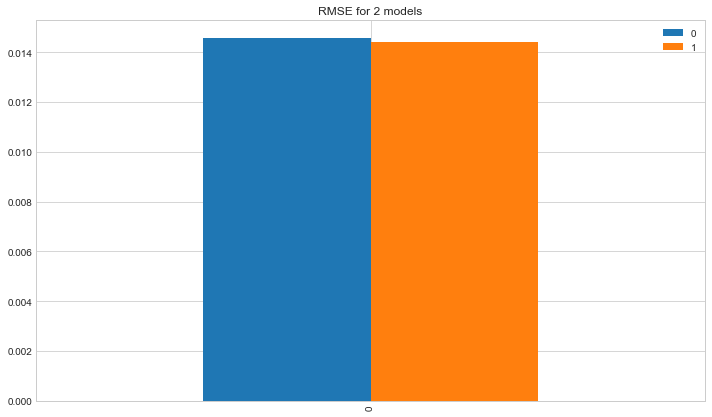

In [12]:
rmsedf.T.plot(figsize=(12,7),title='RMSE for 2 models',kind='bar')

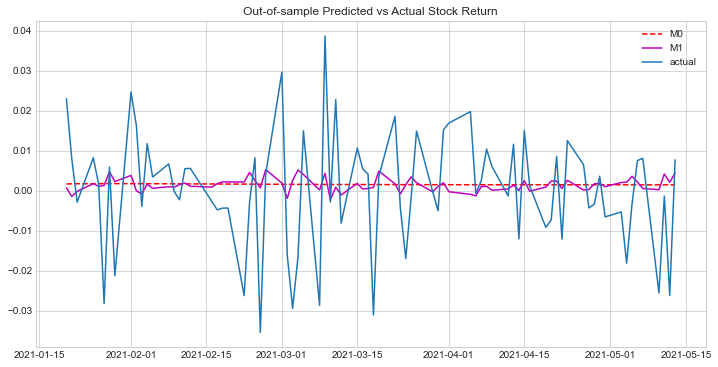

In [13]:
regimeSwitch.plotCompareModel(actual, predictV, 'Out-of-sample Predicted vs Actual Stock Return')

<AxesSubplot:title={'center':'QQQ Predicted Probability of 3 regimes under model 1'}, xlabel='Date'>

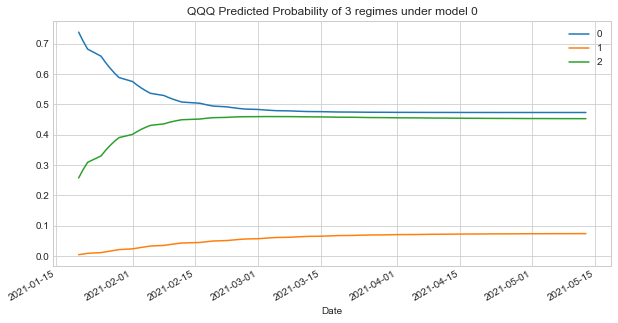

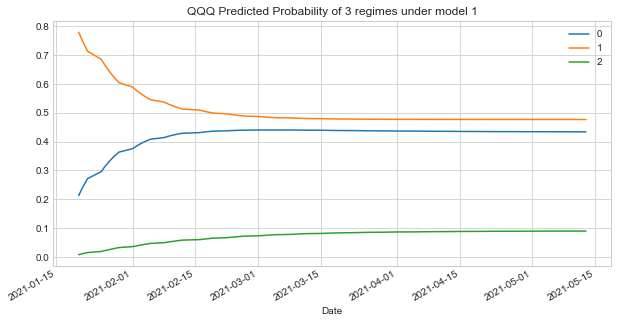

In [14]:
predictP[0].plot(title='QQQ Predicted Probability of 3 regimes under model 0', figsize=(10,5))
predictP[1].plot(title='QQQ Predicted Probability of 3 regimes under model 1', figsize=(10,5))

<AxesSubplot:title={'center':'QQQ stock return '}, xlabel='Date'>

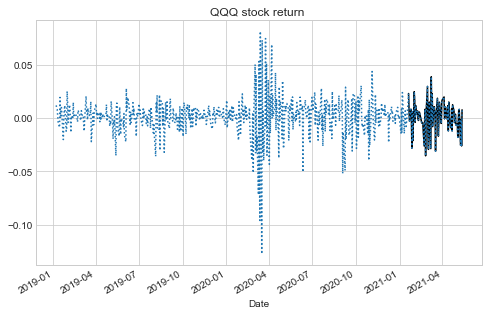

In [15]:
plt.figure(figsize=(8,5))
actual.plot(title='QQQ stock return ',color='k')
mrsPreprocess(df).df['ret'].plot(linestyle='dotted')